In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('airline_passengers.csv',index_col='Month',parse_dates=True)
df.index.freq = 'MS'
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [2]:
mydf = pd.read_csv('airline_passengers.csv')
mydf

,Month,Thousands of Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [3]:
df.tail()

,Thousands of Passengers
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


## Train Test Split

In [4]:
train_data = df.iloc[:108] 
test_data = df.iloc[108:]

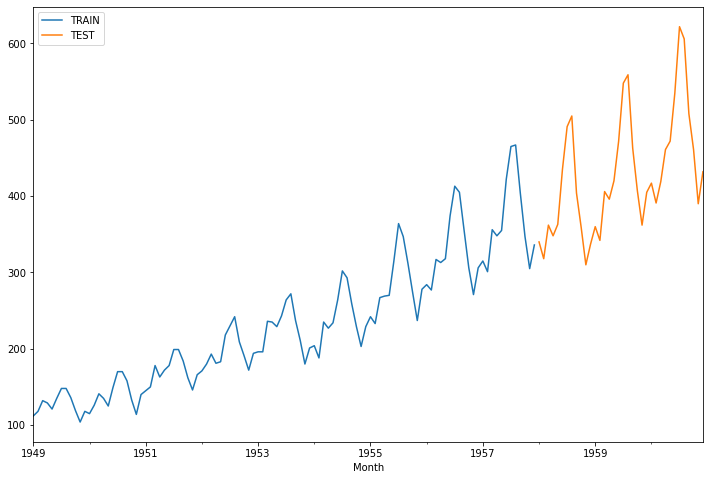

In [5]:
train_data['Thousands of Passengers'].plot(legend=True,label='TRAIN')
test_data['Thousands of Passengers'].plot(legend=True,label='TEST',figsize=(12,8));

## Fitting the Model

In [6]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

model = ExponentialSmoothing(train_data['Thousands of Passengers'],trend='mul',seasonal='mul',seasonal_periods=12)
fitted_model = model.fit()

## Evaluating Model against Test Set

In [7]:
test_predictions = fitted_model.forecast(36)

In [8]:
test_predictions

1958-01-01    356.968595
1958-02-01    344.588791
1958-03-01    405.718334
1958-04-01    400.610841
1958-05-01    409.001673
1958-06-01    480.694167
1958-07-01    530.470025
1958-08-01    523.288484
1958-09-01    454.210536
1958-10-01    392.518080
1958-11-01    345.928356
1958-12-01    396.605092
1959-01-01    408.958806
1959-02-01    394.775963
1959-03-01    464.808636
1959-04-01    458.957269
1959-05-01    468.570172
1959-06-01    550.704223
1959-07-01    607.729620
1959-08-01    599.502133
1959-09-01    520.363420
1959-10-01    449.685849
1959-11-01    396.310627
1959-12-01    454.368108
1960-01-01    468.521062
1960-02-01    452.272578
1960-03-01    532.505066
1960-04-01    525.801484
1960-05-01    536.814446
1960-06-01    630.910800
1960-07-01    696.241584
1960-08-01    686.815816
1960-09-01    596.151052
1960-10-01    515.179740
1960-11-01    454.030756
1960-12-01    520.543941
Freq: MS, dtype: float64

In [9]:
#train_data['Thousands of Passengers'].plot(legend=True,label='TRAIN')
#test_data['Thousands of Passengers'].plot(legend=True,label='TEST',figsize=(12,8));

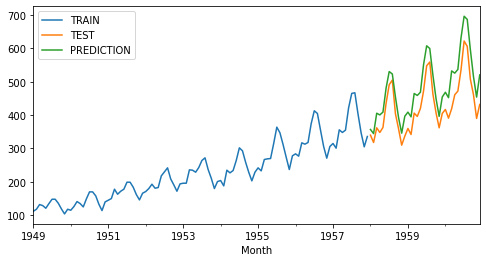

In [10]:
train_data['Thousands of Passengers'].plot(legend=True,label='TRAIN')
test_data['Thousands of Passengers'].plot(legend=True,label='TEST',figsize=(8,4))
test_predictions.plot(legend=True,label='PREDICTION');

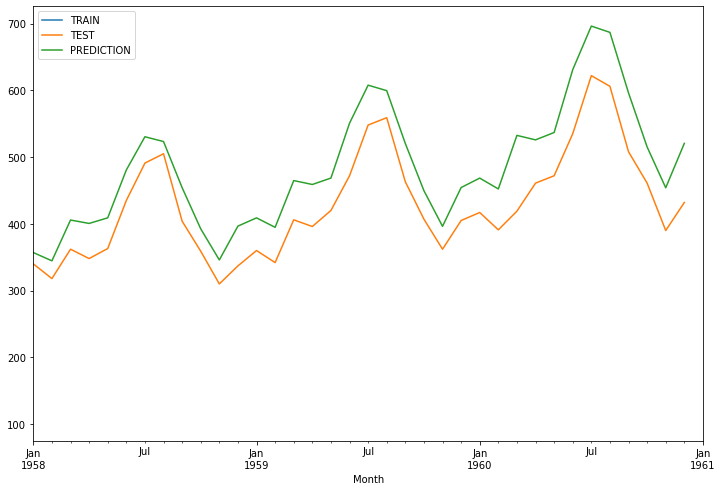

In [11]:
train_data['Thousands of Passengers'].plot(legend=True,label='TRAIN')
test_data['Thousands of Passengers'].plot(legend=True,label='TEST',figsize=(12,8))
test_predictions.plot(legend=True,label='PREDICTION',xlim=['1958-01-01','1961-01-01']);

## Evaluation Metrics

In [12]:
from sklearn.metrics import mean_squared_error

In [13]:
mean_squared_error(test_data,test_predictions)

3525.8835849096904

In [14]:
np.sqrt(mean_squared_error(test_data,test_predictions))

59.37915109623655

In [15]:
test_data.describe()

,Thousands of Passengers
count,36.000000
mean,428.500000
std,79.329152
min,310.000000
25%,362.000000
50%,412.000000
75%,472.000000
max,622.000000


## Forecasting into Future

In [16]:
final_model = ExponentialSmoothing(df['Thousands of Passengers'],trend='mul',seasonal='mul',seasonal_periods=12).fit()

In [17]:
forecast_predictions = final_model.forecast(36)

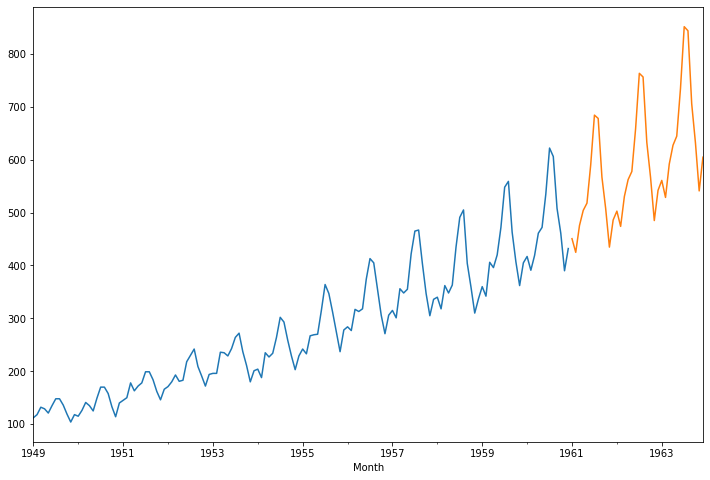

In [18]:
df['Thousands of Passengers'].plot(figsize=(12,8))
forecast_predictions.plot();